In [14]:
print("hello world")

hello world


In [15]:
import dlib
import cv2

import numpy as np

In [16]:
import os
os.chdir('D:\Tech_New_FUTURE\FACE_SWAP\Practice')

In [17]:

import matplotlib.pyplot as plt


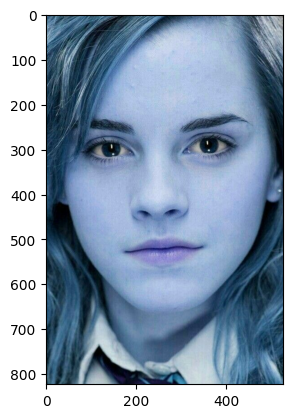

In [18]:
image = cv2.imread('notebook\DestinationImage1.jpg')
plt.imshow(image)


In [19]:

image.shape

(823, 528, 3)

In [20]:
#detect face
face_detector=dlib.get_frontal_face_detector()
point_detector=dlib.shape_predictor("D:\Tech_New_FUTURE\FACE_SWAP\Practice\shape_predictor_68_face_landmarks.dat")

In [21]:

face_detection = face_detector(image, 1)
face_detection

rectangles[[(40, 194) (502, 657)]]

In [22]:
cv2.circle(image,(300,30),1 ,(255,0,0),2)

array([[[119, 140, 171],
        [142, 166, 196],
        [105, 129, 159],
        ...,
        [162, 156, 157],
        [173, 168, 167],
        [157, 152, 151]],

       [[113, 134, 165],
        [125, 149, 179],
        [ 96, 122, 152],
        ...,
        [188, 182, 183],
        [167, 162, 161],
        [163, 158, 157]],

       [[109, 132, 164],
        [110, 135, 167],
        [ 92, 120, 151],
        ...,
        [185, 180, 181],
        [183, 177, 178],
        [167, 161, 162]],

       ...,

       [[ 35,  68,  87],
        [ 25,  58,  77],
        [ 25,  61,  79],
        ...,
        [ 85, 122, 150],
        [ 70, 105, 131],
        [ 53,  88, 114]],

       [[ 31,  64,  83],
        [ 21,  54,  73],
        [ 20,  56,  74],
        ...,
        [ 86, 125, 153],
        [ 71, 108, 134],
        [ 53,  88, 114]],

       [[ 28,  61,  80],
        [ 17,  50,  69],
        [ 17,  53,  71],
        ...,
        [ 89, 128, 156],
        [ 74, 111, 137],
        [ 51,  88, 114]]

In [23]:
for face in face_detection:
    points = point_detector(image, face)
    for point in points.parts():
        cv2.circle(image, (point.x, point.y), 2, (255, 0, 0), 2)

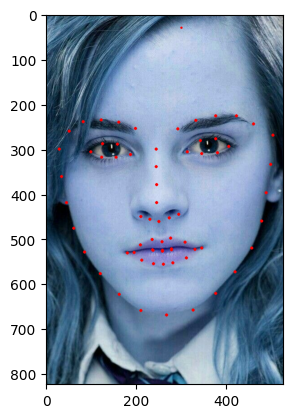

In [24]:
plt.imshow(image)

## creating mask

In [25]:
points_list = []

for n in range(0, 68):
    x = points.part(n).x
    y = points.part(n).y
    points_list += [(x,y)]

points = np.array(points_list, np.int32)

In [26]:
# print(points)

In [27]:
points.shape

(68, 2)

In [28]:
#rectangle box rubberband touch externall points thats called convexhull with 68 landmark
convexhull = cv2.convexHull(points=points)

In [29]:
# 21 in 2 channel 
convexhull.shape

(22, 1, 2)

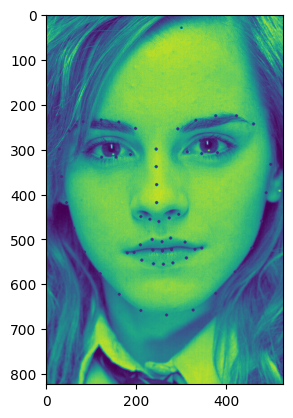

In [30]:
# read img convt in gray scale than check that convexhull how looks 
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [31]:
# for rgb 3 channels
image.shape

(823, 528, 3)

In [32]:
# only one channel gray 
img_gray.shape

(823, 528)

In [33]:
## create mask of that gray image create empty canvas
mask = np.zeros_like(img_gray)


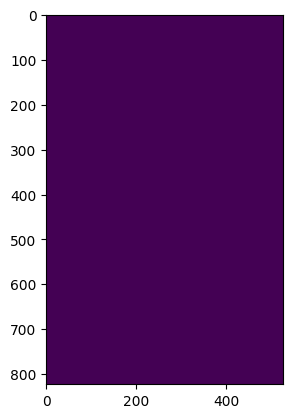

In [34]:
# empty canvas
plt.imshow(mask)

In [35]:
#fill conves polygon in that canvas
cv2.fillConvexPoly(mask, convexhull, 255).shape

(823, 528)

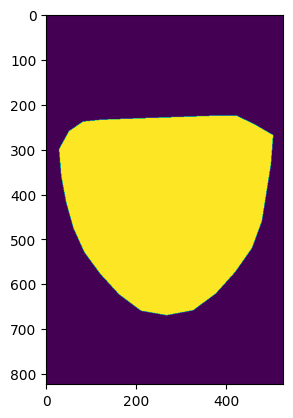

In [36]:
plt.imshow(mask)

## Source Image Landmark

In [37]:
source = cv2.imread("notebook\SourceImage1.jpg")
source_grey = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(source_grey)
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
source_faces = face_detector(source_grey)

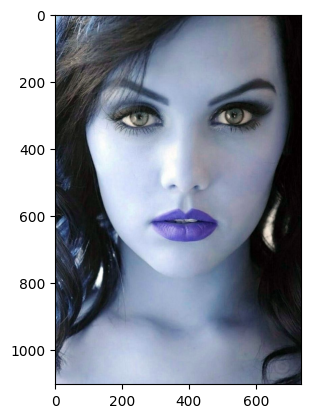

In [38]:
plt.imshow(source)

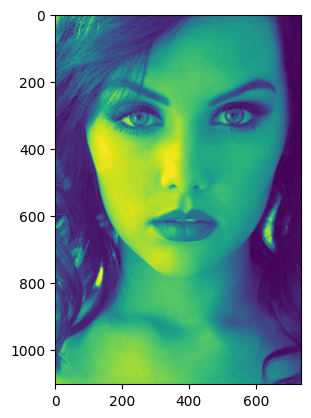

In [39]:
plt.imshow(source_grey)

In [40]:
source_faces

rectangles[[(56, 128) (698, 770)]]

In [41]:
for face in source_faces:
    points = points_detector(source_grey, face)
    points_list = []
    for n in range(0, 68):
        x = points.part(n).x
        y = points.part(n).y
        points_list+=[(x, y)]

    points = np.array(points_list, np.int32)
    convexhull = cv2.convexHull(points)
    cv2.fillConvexPoly(mask, convexhull, 255)
    source_face = cv2.bitwise_and(source, source, mask=mask)

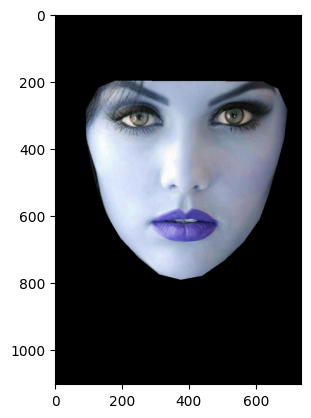

In [42]:
plt.imshow(source_face)

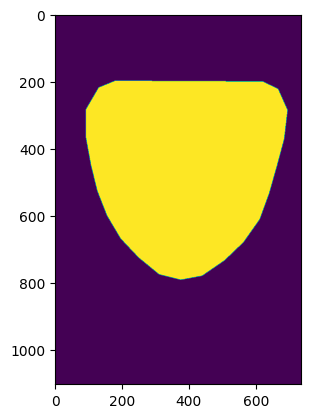

In [43]:
plt.imshow(mask)

In [44]:
rect = cv2.boundingRect(convexhull)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(points_list)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

In [45]:
len(points_list)

68

In [46]:
print(rect)
print(subdiv)
# print(triangles)


(92, 199, 601, 594)
< cv2.Subdiv2D 000001ADCE359350>


In [47]:
for t in triangles:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    cv2.line(source, pt1, pt2, (0, 0, 255))
    cv2.line(source, pt2, pt3, (0, 0, 255))
    cv2.line(source, pt1, pt3, (0, 0, 255))

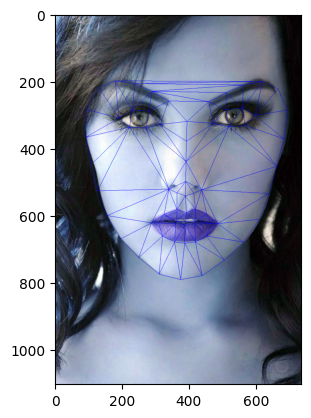

In [48]:
plt.imshow(source)

In [49]:
triangles_id = []

In [50]:
def index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index
for t in triangles:
  pt1 = (t[0], t[1])
  pt2 = (t[2], t[3])
  pt3 = (t[4], t[5])

  id_pt1 = np.where((points == pt1).all(axis=1))
  id_pt1 = index_nparray(id_pt1)
  id_pt2 = np.where((points == pt2).all(axis=1))
  id_pt2 = index_nparray(id_pt2)
  id_pt3 = np.where((points == pt3).all(axis=1))
  id_pt3 = index_nparray(id_pt3)

  if id_pt1 is not None and id_pt2 is not None and id_pt3 is not None:
    triangle = [id_pt1, id_pt2, id_pt3]
    triangles_id.append(triangle)

In [51]:
len(triangles_id)

113

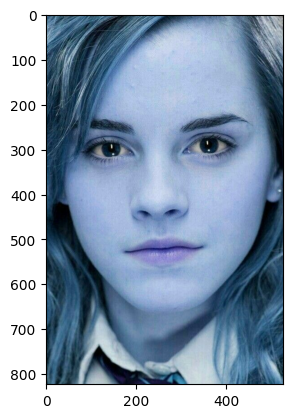

In [53]:
destination = cv2.imread("notebook\DestinationImage1.jpg")

destination_grey = cv2.cvtColor(destination, cv2.COLOR_BGR2GRAY)

destination_faces= face_detector(destination_grey)
for face in destination_faces:
    points_predict2 = points_detector(destination_grey, face)
    points_list2 = []
    for n in range(0, 68):
        x = points_predict2.part(n).x
        y = points_predict2.part(n).y
        points_list2.append((x, y))
    points2 = np.array(points_list2, np.int32)
    convexhull2 = cv2.convexHull(points2)

plt.imshow(destination)

In [54]:
destination_new_face = np.zeros_like(destination, np.uint8)

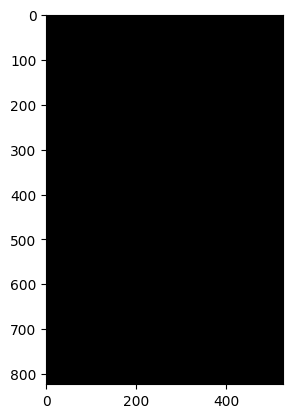

In [55]:
plt.imshow(destination_new_face)

## Image Rendering 

In [56]:
for triangle_index in triangles_id:

    tr1_pt1 = points_list[triangle_index[0]]
    tr1_pt2 = points_list[triangle_index[1]]
    tr1_pt3 = points_list[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1 = cv2.boundingRect(triangle1)
    (x1, y1, w1, h1) = rect1
    cropped_triangle = source[y1: y1 + h1, x1: x1 + w1]
    cropped_tr1_mask = np.zeros((h1, w1), np.uint8)
    points = np.array([[tr1_pt1[0] - x1, tr1_pt1[1] - y1],
                      [tr1_pt2[0] - x1, tr1_pt2[1] - y1],
                      [tr1_pt3[0] - x1, tr1_pt3[1] - y1]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                       mask=cropped_tr1_mask)

    tr2_pt1 = points_list2[triangle_index[0]]
    tr2_pt2 = points_list2[triangle_index[1]]
    tr2_pt3 = points_list2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x2, y2, w2, h2) = rect2
    cropped_triangle2 = destination[y2: y2 + h2, x2: x2 + w2]
    cropped_tr2_mask = np.zeros((h2, w2), np.uint8)
    points2 = np.array([[tr2_pt1[0] - x2, tr2_pt1[1] - y2],
                       [tr2_pt2[0] - x2, tr2_pt2[1] - y2],
                       [tr2_pt3[0] - x2, tr2_pt3[1] - y2]], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                       mask=cropped_tr2_mask)

    points = np.float32(points)
    points2 = np.float32(points2)
    # matrix multipliation 
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w2, h2))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)


    destination_new_face_rect_area = destination_new_face[y2: y2 + h2, x2: x2 + w2]
    destination_new_face_rect_area_gray = cv2.cvtColor(destination_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    
    _, mask_triangles_designed = cv2.threshold(destination_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    destination_new_face_rect_area = cv2.add(destination_new_face_rect_area, warped_triangle)
    destination_new_face[y2: y2 + h2, x2: x2 + w2] = destination_new_face_rect_area

In [57]:
# for triangle_index in triangles_id:
#     # Extracting vertices of the triangles
#     tr1_pts = [points_list[i] for i in triangle_index]
#     tr2_pts = [points_list2[i] for i in triangle_index]
    
#     # Creating a bounding rectangle around the triangles
#     rect1 = cv2.boundingRect(np.array(tr1_pts, dtype=np.int32))
#     rect2 = cv2.boundingRect(np.array(tr2_pts, dtype=np.int32))
    
#     # Cropping the triangles and creating masks for them
#     cropped_tr1, cropped_tr1_mask = crop_and_create_mask(source, tr1_pts, rect1)
#     cropped_tr2, cropped_tr2_mask = crop_and_create_mask(destination, tr2_pts, rect2)
    
#     # Affine transformation: Warp triangle 1 to match triangle 2's shape
#     points = np.float32([pt - [x1, y1] for pt, (x1, y1) in zip(tr1_pts, rect1[:2])])
#     points2 = np.float32([pt - [x2, y2] for pt, (x2, y2) in zip(tr2_pts, rect2[:2])])
#     M = cv2.getAffineTransform(points, points2)
#     warped_triangle = cv2.warpAffine(cropped_tr1, M, (rect2[2], rect2[3]))
    
#     # Masking and adding the warped triangle to the new face
#     destination_new_face = add_warped_triangle_to_face(destination_new_face, rect2, warped_triangle, cropped_tr2_mask)

# # Functions used to streamline the code above:
# def crop_and_create_mask(image, triangle_pts, rect):
#     """
#     This function crops the triangle and creates an associated mask.
#     """
#     (x, y, w, h) = rect
#     cropped_triangle = image[y: y + h, x: x + w]
#     mask = np.zeros((h, w), np.uint8)
    
#     # Offset points by crop location
#     offset_points = np.int32(triangle_pts) - [x, y]
#     cv2.fillConvexPoly(mask, offset_points, 255)
    
#     # Apply the mask
#     cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle, mask=mask)
#     return cropped_triangle, mask

# def add_warped_triangle_to_face(destination_face, rect, warped_tr, mask):
#     """
#     This function masks the warped triangle and adds it to the destination face.
#     """
#     (x, y, w, h) = rect
#     destination_face_rect_area = destination_face[y: y + h, x: x + w]
#     destination_face_rect_area_gray = cv2.cvtColor(destination_face_rect_area, cv2.COLOR_BGR2GRAY)
    
#     # Create a mask to remove the existing triangle in the destination
#     _, mask_triangles_designed = cv2.threshold(destination_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
#     warped_tr = cv2.bitwise_and(warped_tr, warped_tr, mask=mask_triangles_designed)
    
#     # Add the triangle to the destination face
#     destination_face_rect_area = cv2.add(destination_face_rect_area, warped_tr)
#     destination_face[y: y + h, x: x + w] = destination_face_rect_area
#     return destination_face



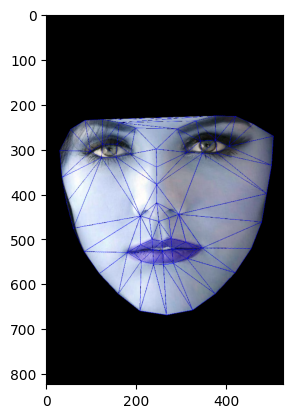

In [58]:
plt.imshow(destination_new_face)

In [59]:
destination_face_mask = np.zeros_like(destination_grey)
destination_head_mask = cv2.fillConvexPoly(destination_face_mask, convexhull2, 255)
destination_face_mask = cv2.bitwise_not(destination_head_mask)

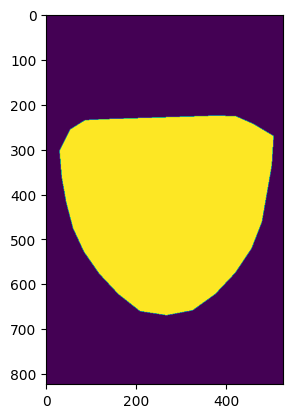

In [60]:
plt.imshow(destination_head_mask)

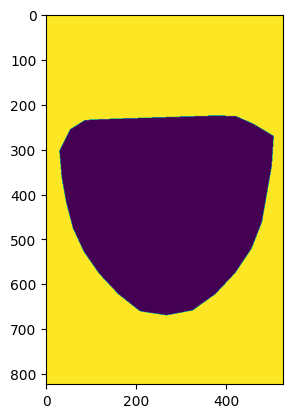

In [61]:
plt.imshow(destination_face_mask)

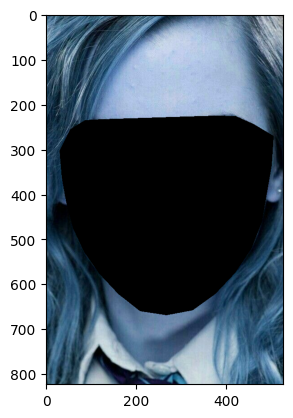

In [62]:
#destination with no face
destination_noface = cv2.bitwise_and(destination, destination, mask=destination_face_mask)
plt.imshow(destination_noface)

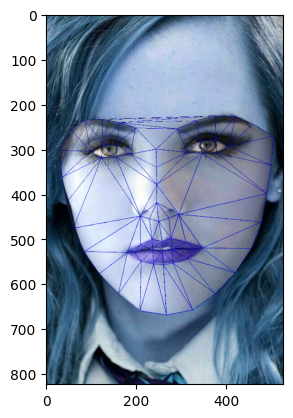

In [63]:
#add face inside on noface
result = cv2.add(destination_noface, destination_new_face)
plt.imshow(result)

In [64]:
(x3, y3, w3, h3) = cv2.boundingRect(convexhull2)
center_face = (int((x3 + x3 + w3) / 2), int((y3 + y3 + h3) / 2))

In [65]:
#center of fave
center_face

(267, 448)

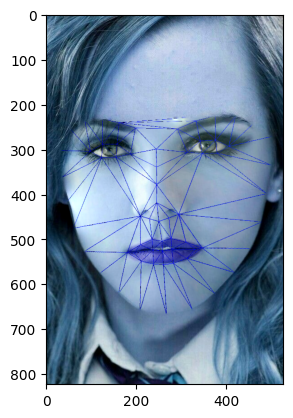

In [66]:
normal_clone = cv2.seamlessClone(result, destination, destination_head_mask, center_face, cv2.NORMAL_CLONE)
plt.imshow(normal_clone);

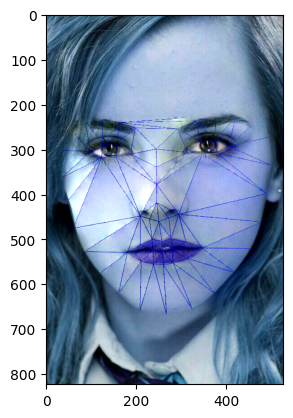

In [67]:

mixed_clone= cv2.seamlessClone(result, destination, destination_head_mask, center_face, cv2.MIXED_CLONE)
plt.imshow(mixed_clone);


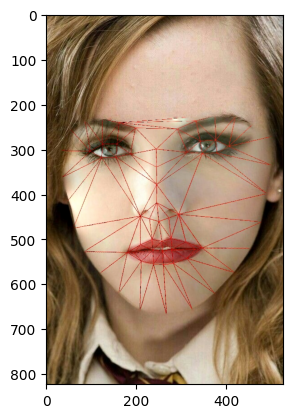

In [69]:
# Save the image using OpenCV
cv2.imwrite('test_img/normal_clone.jpg', normal_clone)

# If you want to display the saved image just to confirm it's saved correctly, you can use:
saved_image = cv2.imread('test_img/normal_clone.jpg')
# Convert the image from BGR to RGB because OpenCV uses BGR by default and matplotlib expects RGB
saved_image = cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB)
plt.imshow(saved_image)
plt.show()


In [70]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [79]:
import cv2
import numpy as np

# Ensure the correct path and filename including the extension is provided
image_path = r'test\normal_clone.jpg'  # Use raw string to handle backslashes correctly

# Load the final image where you want to remove the triangles
final_image = cv2.imread(image_path)

# Check if the image was loaded correctly
if final_image is None:
    raise FileNotFoundError(f"No image found at path: {image_path}")

# Convert the image to grayscale
gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a mask of the black lines
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Use morphological operations to remove the lines
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 1)
erosion = cv2.erode(dilation,kernel,iterations = 1)

# Create a mask where the black lines were
mask = thresh - erosion

# Inpaint the original image where the black lines were
final_image_without_lines = cv2.inpaint(final_image, mask, 3, cv2.INPAINT_TELEA)

# Save the final image - ensure to include the correct output path and filename
output_path = r'test\testimg\a.jpg'  # Use raw string here as well
cv2.imwrite(output_path, final_image_without_lines)


True

In [80]:
import cv2
import numpy as np

# Ensure the correct path and filename including the extension is provided
image_path = r'test\normal_clone.jpg'  # Use raw string to handle backslashes correctly

# Load the final image where you want to remove the red lines
final_image = cv2.imread(image_path)

# Check if the image was loaded correctly
if final_image is None:
    raise FileNotFoundError(f"No image found at path: {image_path}")

# Convert the image to HSV color space
hsv = cv2.cvtColor(final_image, cv2.COLOR_BGR2HSV)

# Define the range of red color in HSV
lower_red = np.array([0, 70, 50])
upper_red = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

# Define the range of red color in HSV
lower_red = np.array([170, 70, 50])
upper_red = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red, upper_red)

# Combine the masks for red color
red_mask = mask1 | mask2

# Inpaint the original image where the red lines were
final_image_without_lines = cv2.inpaint(final_image, red_mask, 3, cv2.INPAINT_TELEA)

# Save the final image - ensure to include the correct output path and filename
output_path = r'test\testimg\a.jpg'  # Use raw string here as well
cv2.imwrite(output_path, final_image_without_lines)


True

In [81]:
import cv2
import numpy as np

# Ensure the correct path and filename including the extension is provided
image_path = r'test\normal_clone.jpg'  # Use a raw string

# Load the final image where you want to remove the red lines
final_image = cv2.imread(image_path)

# Check if the image was loaded correctly
if final_image is None:
    raise FileNotFoundError(f"No image found at path: {image_path}")

# Convert the image to HSV color space
hsv = cv2.cvtColor(final_image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the red color of the lines
# Note: You may need to adjust these values based on the red color shade of the lines
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Create a mask for red color
mask1 = cv2.inRange(hsv, lower_red, upper_red)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
full_mask = mask1 + mask2

# Refine the mask, if necessary, using morphological operations
kernel = np.ones((3,3), np.uint8)
full_mask = cv2.morphologyEx(full_mask, cv2.MORPH_CLOSE, kernel)
full_mask = cv2.morphologyEx(full_mask, cv2.MORPH_OPEN, kernel)

# Inpaint the original image where the red lines were
final_image_without_red_lines = cv2.inpaint(final_image, full_mask, 3, cv2.INPAINT_TELEA)

# Save or display the final image
output_path = r'test\testimg\a.jpg'  # Use a raw string for the file path
cv2.imwrite(output_path, final_image_without_red_lines)


True